# Analisis Data COVID19 di Indonesia

## Latar Belakang Project
COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

## Mengakses API covid.go.id

In [1]:
library(httr)
resp <- GET ("https://data.covid19.go.id/public/api/update.json")

Warning message:
"package 'httr' was built under R version 3.6.3"

In [2]:
status_code(resp)

[1] 200

In [3]:
#jalankan fungsi headers() pada resp untuk mengetahui metadata apa saja 
#yang tersimpan. Apakah isi dari elemen content-type? dan Kapan terakhir kali informasi diperbaharui
headers(resp)



$server
[1] "nginx"

$date
[1] "Tue, 25 Aug 2020 12:33:51 GMT"

$`content-type`
[1] "application/json"

$`last-modified`
[1] "Tue, 25 Aug 2020 12:32:32 GMT"

$`transfer-encoding`
[1] "chunked"

$connection
[1] "keep-alive"

$vary
[1] "Accept-Encoding"

$etag
[1] "W/\"5f4504e0-106f2\""

$`content-encoding`
[1] "gzip"

attr(,"class")
[1] "insensitive" "list"

## Mengekstrak Isi Respon
Respon API dengan status code 200 menyatakan bahwa permintaan berhasil dipenuhi dan konten yang diminta tersedia untuk diekstrak.

In [4]:
#Gunakan fungsi content() untuk mengekstrak konten
#Fungsi content() secara cerdas akan menyesuaikan output sesuai dengan jenis berkas yang tersedia,
# dalam hal ini adalah berkas JSON. 
# Tambahkan argumen as="parsed" dam simplyfyvector = TRUE
# Konten akan disimpan sebagai cov_id_raw
cov_id_raw <- content(resp, as = "parsed" , simplifyVector = TRUE)

In [5]:
# Gunakan fungsi length() dan names() untuk mengamati komponen serta apa saja nama komponen yang adalength(cov_id_raw)
# simpan dengan nama cov_id_update
length(cov_id_raw)
names(cov_id_raw)
cov_id_update <- cov_id_raw$update

[1] 2

[1] "data"   "update"

## Analisa Data
Menganalisa data untuk menjawab pertanyaan-pertanyaan berikut:
- Kapan tanggal pembaharuan data penambahan kasus?
- Berapa jumlah penambahan kasus sembuh?
- Berapa jumlah penambahan kasus meninggal?
- Berapa jumlah total kasus positif hingga saat ini?
- Berapa jumlah total kasus meninggal hingga saat ini?

In [6]:
cov_id_update$penambahan$tanggal
cov_id_update$penambahan$jumlah_sembuh
cov_id_update$penambahan$jumlah_meninggal
cov_id_update$total$jumlah_positif
cov_id_update$total$jumlah_meninggal

[1] "2020-08-25"

[1] 1807

[1] 99

[1] 157859

[1] 6858

Dari hasil diatas terlihat bahwa
1. Pembaharuan data penambahan kasus dilakukan pada tangal 25 Agustus 2020
2. Penambahan kasus sembuh sebanyak 3560 Kasus
3. Terdapat 79 penambahan kasus meninggal
4. Hingga pembaharuan data terakhir, terdapat 155412 total kasus positif
5. Sebanyak 6759 total kasus meninggal.

## Apa kabar Riau? 

In [7]:
library(httr)
resp_riau <- GET("https://data.covid19.go.id/public/api/prov_detail_RIAU.json")
cov_riau_raw <- content(resp_riau, as = "parsed", simplifyVector = TRUE)
cov_riau_raw$kasus_total
cov_riau_raw$meninggal_persen
cov_riau_raw$sembuh_persen

[1] 1279

[1] 1.641908

[1] 64.0344

Dari data diatas terlihat bahwa :
1. Jumlah total kasus COVID-19 di Riau sebanyak 1279 kasus
2. Persentase kematian akibat COVID-19 di Riau adalah 1.6419%
3. dan Persentasi tingkat kesembuah dari Covid-19 di Riau adalah 64.0344%

## Memperoleh Informasi yang Lebih lengkap

In [8]:
cov_riau <- cov_riau_raw$list_perkembangan
str(cov_riau)
head(cov_riau)

'data.frame':	149 obs. of  9 variables:
 $ tanggal                     : num  1.59e+12 1.59e+12 1.59e+12 1.59e+12 1.59e+12 ...
 $ KASUS                       : int  1 1 0 0 4 3 0 1 1 0 ...
 $ MENINGGAL                   : int  0 0 0 1 0 0 0 1 0 0 ...
 $ SEMBUH                      : int  0 0 0 0 0 0 1 0 0 0 ...
 $ DIRAWAT_OR_ISOLASI          : int  1 1 0 -1 4 3 -1 0 1 0 ...
 $ AKUMULASI_KASUS             : int  1 2 2 2 6 9 9 10 11 11 ...
 $ AKUMULASI_SEMBUH            : int  0 0 0 0 0 0 1 1 1 1 ...
 $ AKUMULASI_MENINGGAL         : int  0 0 0 1 1 1 1 2 2 2 ...
 $ AKUMULASI_DIRAWAT_OR_ISOLASI: int  1 2 2 1 5 8 7 7 8 8 ...


tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
1.585440e+12,1,0,0,1,1,0,0,1
1.585526e+12,1,0,0,1,2,0,0,2
1.585613e+12,0,0,0,0,2,0,0,2
1.585699e+12,0,1,0,-1,2,0,1,1
1.585786e+12,4,0,0,4,6,0,1,5
1.585872e+12,3,0,0,3,9,0,1,8


## Menjinakkan Data
Setelah mengekstrak dan mengamati cov_riau, ditemukan beberapa kejanggalan pada data tersebut. Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. Sekarang akan dilakukan beberapa tahapan untuk menjinakan data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah.

Ada beberapa tahapan yang akan Anda lakukan untuk menjinakan data cov_riau, yaitu:

1. Menghapus kolom “DIRAWAT_OR_ISOLASI” dan “AKUMULASI_DIRAWAT_OR_ISOLASI”
2. Menghapus semua kolom yang berisi nilai kumulatif
3. Mengganti nama kolom “KASUS” menjadi “kasus_baru”
4. Merubah format penulisan kolom berikut menjadi huruf kecil
    - kolom MENINGGAL
    - kolom SEMBUH
5. Memperbaiki data pada kolom tanggal


In [9]:
# Mengunakan packages dply untuk melakukan pengolahan data
# Gunakan operator pipe %>% untuk merangkai fungsi menjadi sebuah pipeline.
# Menyimpan hasil pengolahan dengan nama new_cov_riau
library(dplyr)
new_cov_riau <-
  cov_riau %>% 
  select(-contains("DIRAWAT_OR_ISOLASI")) %>% 
  select(-starts_with("AKUMULASI")) %>% 
  rename(
    kasus_baru = KASUS,
    meninggal = MENINGGAL,
    sembuh = SEMBUH
    ) %>% 
  mutate(
    tanggal = as.POSIXct(tanggal / 1000, origin = "1970-01-01"),
    tanggal = as.Date(tanggal)
  )
str(new_cov_riau) 

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



'data.frame':	149 obs. of  4 variables:
 $ tanggal   : Date, format: "2020-03-29" "2020-03-30" ...
 $ kasus_baru: int  1 1 0 0 4 3 0 1 1 0 ...
 $ meninggal : int  0 0 0 1 0 0 0 1 0 0 ...
 $ sembuh    : int  0 0 0 0 0 0 1 0 0 0 ...


## Menunjukkan Melalui Gambar


Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'hrbrthemes' was built under R version 3.6.3"NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.
      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and
      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow


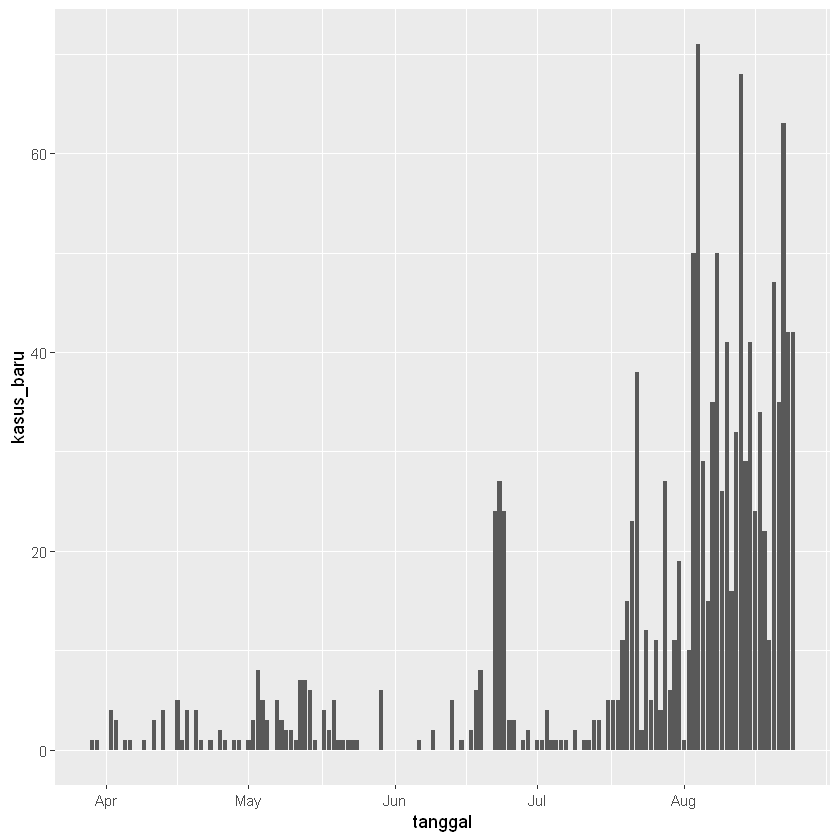

In [10]:
library(ggplot2)
library(hrbrthemes)
ggplot(new_cov_riau, aes(x = tanggal, y = kasus_baru)) +
  geom_col()

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows f

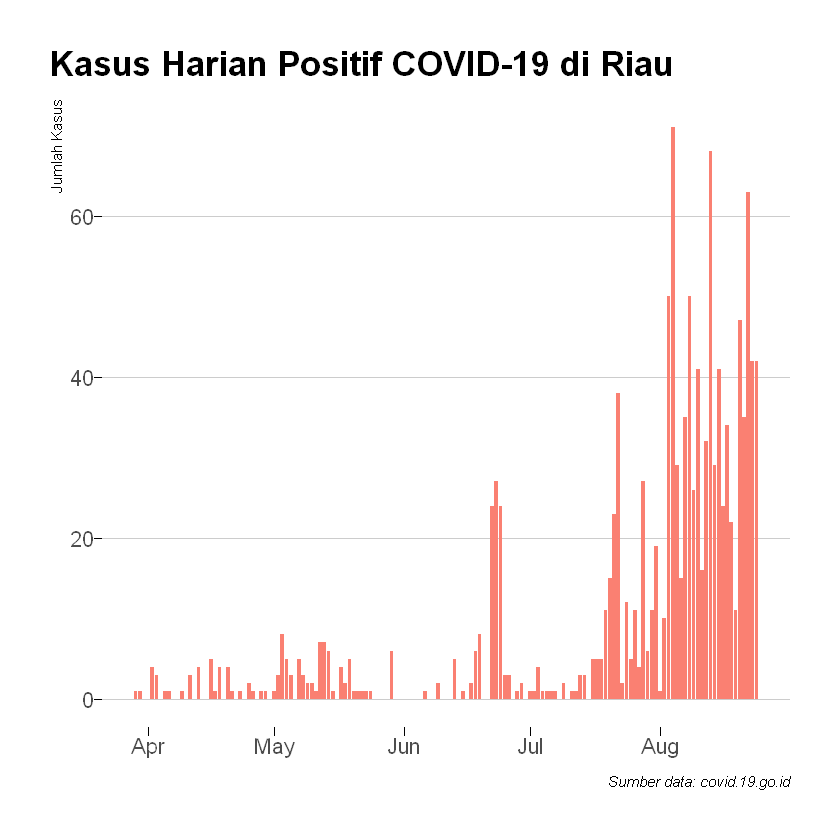

In [11]:
library(ggplot2)
library(hrbrthemes)
ggplot(new_cov_riau, aes(tanggal, kasus_baru)) +
	geom_col(fill = "salmon") +
	labs(
	  x = NULL,
	  y = "Jumlah Kasus",
	  title = "Kasus Harian Positif COVID-19 di Riau",
	  caption = "Sumber data: covid.19.go.id"
	) +
	theme_ipsum(
	  base_size = 13,
	  plot_title_size = 21,
	  grid = "Y",
	  ticks = TRUE
	) +
	theme(plot.title.position = "plot")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

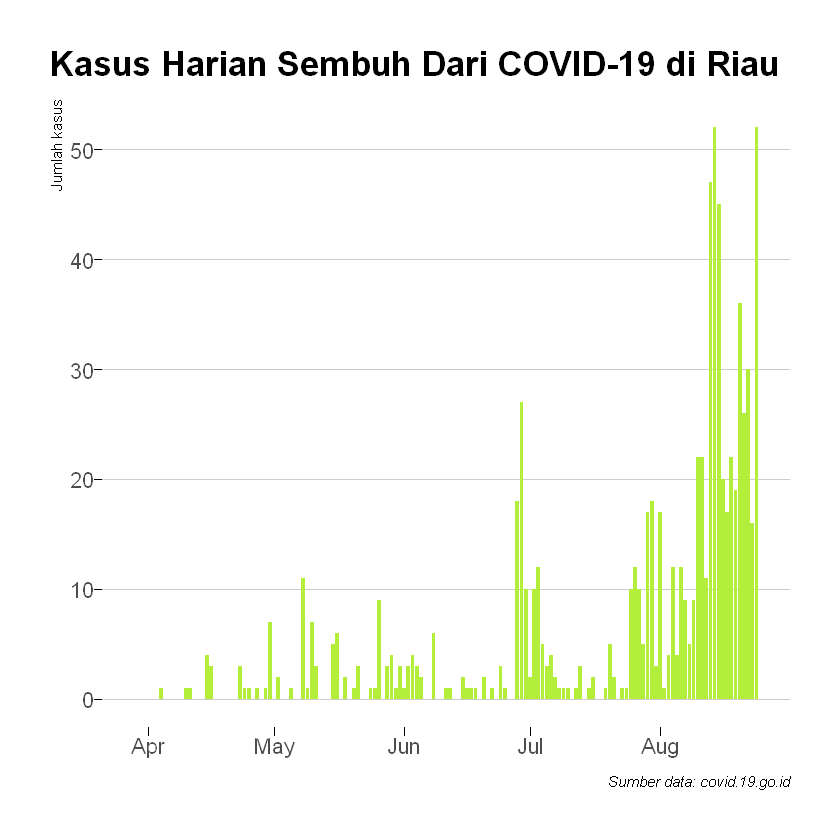

In [12]:
library(ggplot2)
library(hrbrthemes)
ggplot(new_cov_riau, aes(tanggal, sembuh)) +
  geom_col(fill = "olivedrab2") +
  labs(
    x = NULL,
    y = "Jumlah kasus",
    title = "Kasus Harian Sembuh Dari COVID-19 di Riau",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13, 
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

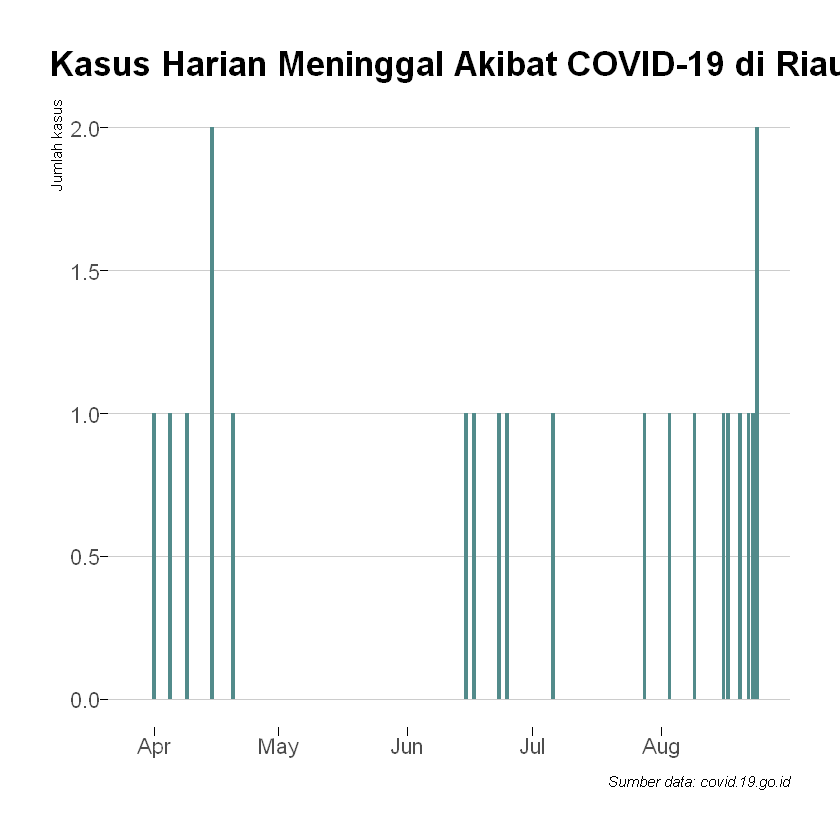

In [13]:
library(ggplot2)
library(hrbrthemes)
ggplot(new_cov_riau, aes(tanggal, meninggal)) +
  geom_col(fill = "darkslategray4") +
  labs(
    x = NULL,
    y = "Jumlah kasus",
    title = "Kasus Harian Meninggal Akibat COVID-19 di Riau",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13, 
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

## Apakah Pekan ini lebih baik?
Setelah mengamati grafik perkembangan kasus terlihat bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut, kemudian diamati bagaimana perkembangan kasus dalam rentang waktu pekanan.

In [14]:
library(dplyr)
library(lubridate)

cov_riau_pekanan <- new_cov_riau %>% 
  count(
    tahun = year(tanggal),
    pekan_ke = week(tanggal),
    wt = kasus_baru,
    name = "jumlah"
  )

glimpse(cov_riau_pekanan)

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Rows: 22
Columns: 3
$ tahun    <dbl> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020...
$ pekan_ke <dbl> 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27...
$ jumlah   <int> 2, 9, 8, 15, 5, 21, 20, 25, 5, 6, 3, 6, 67, 33, 10, 10, 64...


In [15]:
library(dplyr)
cov_riau_pekanan <-
  cov_riau_pekanan %>% 
  mutate(
    jumlah_pekanlalu = dplyr::lag(jumlah, 1),
    jumlah_pekanlalu = ifelse(is.na(jumlah_pekanlalu), 0, jumlah_pekanlalu),
    lebih_baik = jumlah < jumlah_pekanlalu
  )
glimpse(cov_riau_pekanan)

Rows: 22
Columns: 5
$ tahun            <dbl> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 20...
$ pekan_ke         <dbl> 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25...
$ jumlah           <int> 2, 9, 8, 15, 5, 21, 20, 25, 5, 6, 3, 6, 67, 33, 10...
$ jumlah_pekanlalu <dbl> 0, 2, 9, 8, 15, 5, 21, 20, 25, 5, 6, 3, 6, 67, 33,...
$ lebih_baik       <lgl> FALSE, FALSE, TRUE, FALSE, TRUE, FALSE, TRUE, FALS...


Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not 

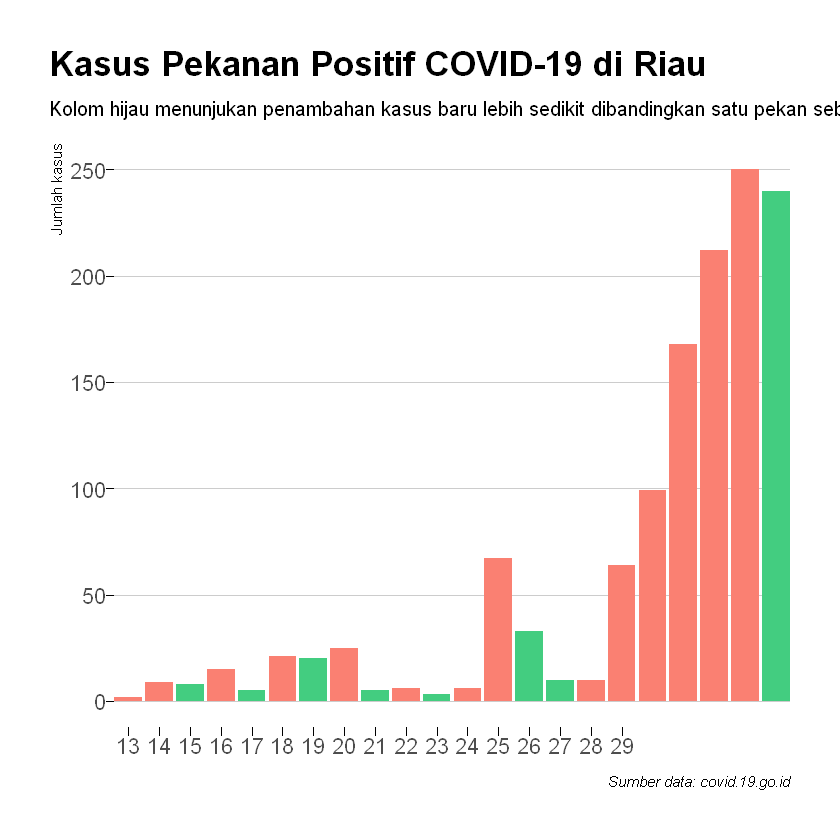

In [16]:
library(ggplot2)
library(hrbrthemes)
ggplot(cov_riau_pekanan, aes(pekan_ke, jumlah, fill = lebih_baik)) +
	geom_col(show.legend = FALSE) +
	scale_x_continuous(breaks = 9:29, expand = c(0, 0)) +
	scale_fill_manual(values = c("TRUE" = "seagreen3", "FALSE" = "salmon")) +
	labs(
		x = NULL,
		y = "Jumlah kasus",
		title = "Kasus Pekanan Positif COVID-19 di Riau",
		subtitle = "Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya",
		caption = "Sumber data: covid.19.go.id"
	) +
	theme_ipsum(
		base_size = 13,
		plot_title_size = 21,
		grid = "Y",
		ticks = TRUE
	) +
	theme(plot.title.position = "plot")

## Hingga saat ini ada berapa kasus yang masih aktif?

In [17]:
library(dplyr)
cov_riau_akumulasi <- 
  new_cov_riau %>% 
  transmute(
    tanggal,
    akumulasi_aktif = cumsum(kasus_baru) - cumsum(sembuh) - cumsum(meninggal),
    akumulasi_sembuh = cumsum(sembuh),
    akumulasi_meninggal = cumsum(meninggal)
  )

tail(cov_riau_akumulasi)

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
144,2020-08-19,374,659,16
145,2020-08-20,384,695,17
146,2020-08-21,393,721,17
147,2020-08-22,425,751,18
148,2020-08-23,450,767,19
149,2020-08-24,438,819,21


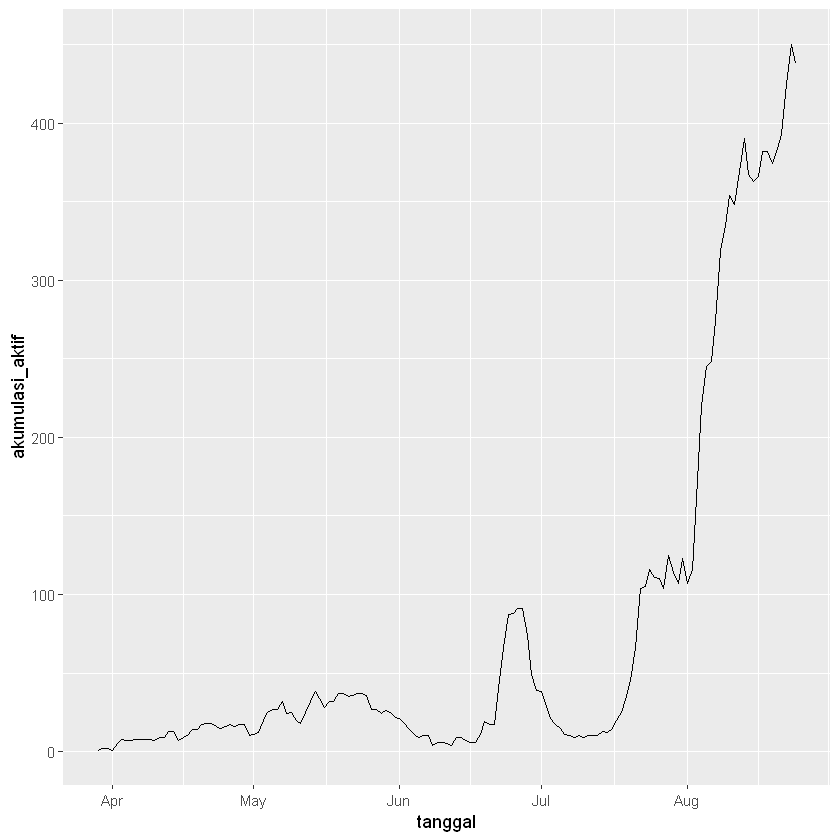

In [18]:
library(ggplot2)
ggplot(data = cov_riau_akumulasi, aes(x = tanggal, y = akumulasi_aktif)) +
  geom_line()

## Kabar buruk dan Kabar baik
Akan dibuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal. 

In [19]:
# Menggunakan fungsi gather() dari paket tidyr untuk mentransformasi data cov_riau_akumulasi
# Mengubah data yang berformat wide menjadi format long
# menyimpan hasil transformasi sebgai cov_riau_akumulasi_pivot
library(dplyr)
library(tidyr)

dim(cov_riau_akumulasi)

cov_riau_akumulasi_pivot <- 
  cov_riau_akumulasi %>% 
  gather(
    key = "kategori",
    value = "jumlah",
    -tanggal
  ) %>% 
  mutate(
    kategori = sub(pattern = "akumulasi_", replacement = "", kategori)
  )

dim(cov_riau_akumulasi_pivot)

glimpse(cov_riau_akumulasi_pivot)

Warning message:
"package 'tidyr' was built under R version 3.6.3"

[1] 149   4

[1] 447   3

Rows: 447
Columns: 3
$ tanggal  <date> 2020-03-29, 2020-03-30, 2020-03-31, 2020-04-01, 2020-04-0...
$ kategori <chr> "aktif", "aktif", "aktif", "aktif", "aktif", "aktif", "akt...
$ jumlah   <int> 1, 2, 2, 1, 5, 8, 7, 7, 8, 8, 8, 8, 7, 9, 9, 13, 13, 7, 9,...


## Grafik Komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not 

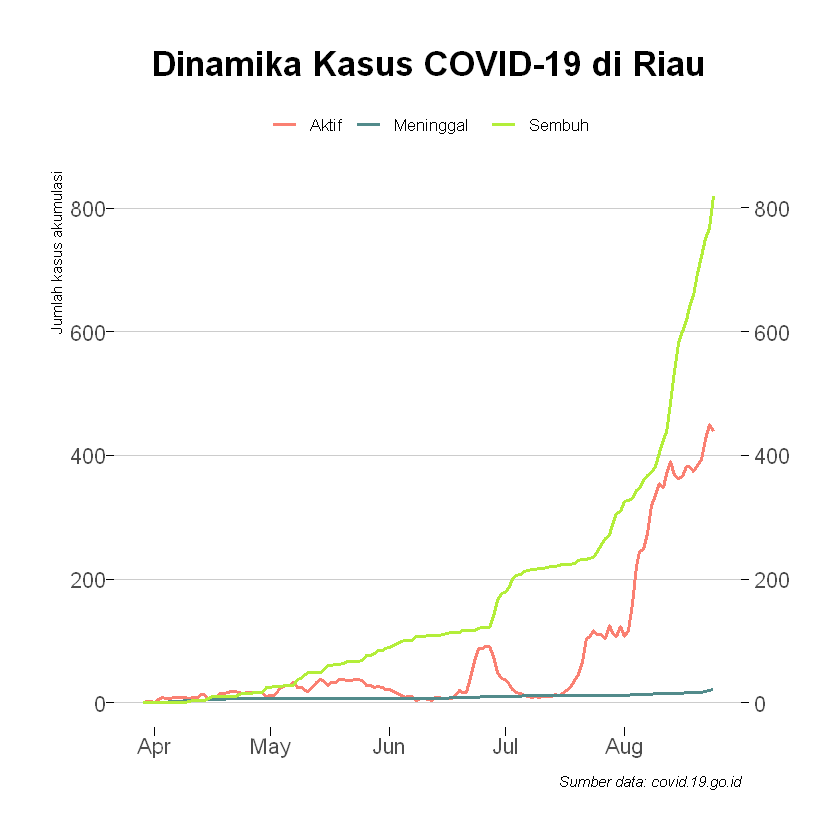

In [20]:
library(ggplot2)
library(hrbrthemes)
ggplot(cov_riau_akumulasi_pivot, aes(tanggal, jumlah, colour = (kategori))) +
	geom_line(size = 0.9) +
	scale_y_continuous(sec.axis = dup_axis(name = NULL)) +
	scale_colour_manual(
		values = c(
			"aktif" = "salmon",
			"meninggal" = "darkslategray4",
			"sembuh" = "olivedrab2"
		),
		labels = c("Aktif", "Meninggal", "Sembuh")
	) +
	labs(
		x = NULL,
		y = "Jumlah kasus akumulasi",
		colour = NULL,
		title = "Dinamika Kasus COVID-19 di Riau",
		caption = "Sumber data: covid.19.go.id"
	) +
	theme_ipsum(
		base_size = 13,
		plot_title_size = 21,
		grid = "Y",
		ticks = TRUE
	) +
	theme(
		plot.title = element_text(hjust = 0.5),
		legend.position = "top"
	)